In [12]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [14]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [15]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [16]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

In [17]:
#欠損値を含む行を削除
df.dropna()

,A,B,C,D
0,1,2,3,4


In [18]:
#欠損値を含む列を削除
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,10,11


In [19]:
#全ての列が欠損値である行だけ削除
df.dropna(how='all')

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [20]:
#欠損値でないものが4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1,2,3,4


In [21]:
#特定の列に欠損値が含まれている行だけ削除
df.dropna(subset=['C'])

,A,B,C,D
0,1,2,3,4
2,10,11,12,NaN


In [22]:
from sklearn.preprocessing import Imputer
#欠損値補完のインスタンスを生成(平均値補完法)
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
#データを適合
imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [23]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [24]:
#Tシャツのサイズと整数を対応させるディクショナリーを生成
size_mapping = {'XL':3,'L':2,'M':1}
#Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [25]:
size_mapping.items()

dict_items([('M', 1), ('XL', 3), ('L', 2)])

In [26]:
#整数を文字列に戻す場合
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [27]:
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

In [28]:
#クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [29]:
#クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [30]:
#もとの文字列に戻す
inv_class_mapping = {v:k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [31]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダーのインスタンス生成
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [33]:
#もとに戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [34]:
#Tシャツの色、サイズ、価格を抽出
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [98]:
X

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [35]:
from sklearn.preprocessing import OneHotEncoder
# one-hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0],sparse=False)
#実行
ohe.fit_transform(X)

ValueError: could not convert string to float: 'XL'

In [36]:
pd.get_dummies(df[['price','color','size']])

,price,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


In [37]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
from sklearn.cross_validation import train_test_split
#特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#トレーニングデータとテストデータに分割
#全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
#データの正規化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)

In [43]:
#データの標準化
from sklearn.preprocessing import StandardScaler
#標準化のインスタンスを生成
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

特徴量の選択

In [45]:
from sklearn.linear_model import LogisticRegression
#L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
#トレーニングデータに対する正解率を表示
print('Training accuracy:', lr.score(X_train_std,y_train))
#テストデータに対する正解率を表示
print('Test accuracy:', lr.score(X_test_std,y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [46]:
#切片の表示
lr.intercept_

array([-0.38380834, -0.1580702 , -0.700387  ])

In [47]:
#重み係数の表示
lr.coef_

array([[ 0.2800285 ,  0.        ,  0.        , -0.02801134,  0.        ,
         0.        ,  0.7097027 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23670052],
       [-0.64401903, -0.06878883, -0.05720717,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92676376,
         0.06026381,  0.        , -0.37107869],
       [ 0.        ,  0.06127975,  0.        ,  0.        ,  0.        ,
         0.        , -0.63697599,  0.        ,  0.        ,  0.49841156,
        -0.35820005, -0.57036135,  0.        ]])

In [53]:
np.array(lr.coef_[1])

array([-0.64401903, -0.06878883, -0.05720717,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.92676376,
        0.06026381,  0.        , -0.37107869])

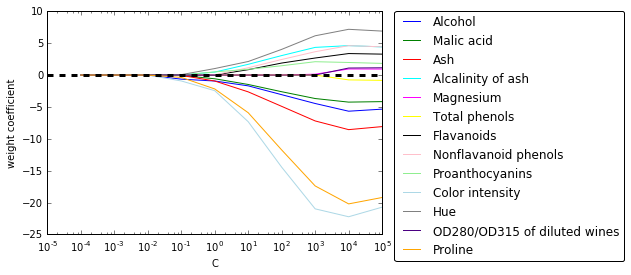

In [71]:
import matplotlib.pyplot as plt
#描画の準備
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

#空のリストを生成(重み係数、逆正則化パラメータ)
weights, params = [], []
#逆正則化パラメータの値ごとに処理
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1', C= 10**c, random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

#重み係数をNumpy配列に変換
weights = np.array(weights)
#各重み係数をプロット
for  column, color, in zip(range(weights.shape[1]), colors):
    #横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column],label=df_wine.columns[column+1],color=color)

#y=0 に黒い波線を引く
plt.axhline(0, color='black',linestyle='--',linewidth=3)
#横軸の範囲の設定
plt.xlim([10**(-5),10**5])
#軸のラベル設定
plt.ylabel('weight coefficient')
plt.xlabel('C')
#横軸を対数スケールに変換
plt.xscale('log')

plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

逐次後退選択
SBSアルゴリズム

In [72]:
X

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [94]:
from sklearn.base import clone
from itertools import combinations
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    '''
    逐次後退選択を実行するクラス
    '''
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                        test_size=0.25,random_state=1):
        self.scoring = scoring  #特徴量を評価する指標
        self.estimator = clone(estimator)  #推定器
        self.k_features = k_features  #選択する特徴量の個数
        self.test_size = test_size  #テストデータの割合
        self.random_state = random_state  #乱数種を固定するrandom_state
            
    def fit(self, X, y):
        #トレーニングデータとテストデータに分割
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=self.test_size,
                                                           random_state=self.random_state)
        #すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        #すべてのインデックスのタプルを取得
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        #すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        #スコアを格納
        self.scores_ = [score]
        
        #ここまでは全特徴量で計算している
        
        #指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            #空のリストを作成
            scores = []
            subsets = []
            
            #特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            #conbinations(タプル,抽出数)でタプルから抽出数分の特徴量の全組あわせをループ
            for p in combinations(self.indices_, r=dim-1):
                #スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                #特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            #最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            #最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            #特徴量の個数を１つだけ減らして次のステップへ
            dim -= 1
            
            #スコアを格納
            self.scores_.append(scores[best])
            
        #最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        #抽出した特徴量を返す
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        #指定された列番号indicesの特徴量を抽出してモデルに適合
        self.estimator.fit(X_train[:,indices], y_train)
        #テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        #真のクラスラベルと予測値を用いてスコアを算出
        score = self.scoring(y_test, y_pred)
        return score
    

In [74]:
accuracy_score

<function sklearn.metrics.classification.accuracy_score>

In [77]:
[tuple(range(4))]

[(0, 1, 2, 3)]

KNN分類器を使ってSBSを実装

In [95]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#k近傍分類器のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=2)
#逐次後退選択のインスタンスを生成(特徴量の個数が1になるまで特徴量を選択)
sbs = SBS(knn, k_features=1)
#逐次後退選択を実行
sbs.fit(X_train_std,y_train)

正解率可視化

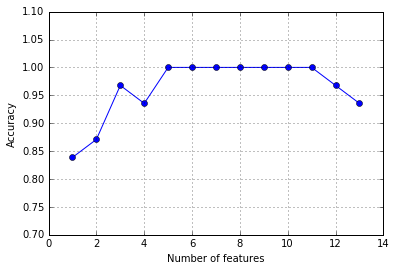

In [97]:
#近傍点の個数のリスト
#sbs.subsets_は特徴量を選択していくたびにそのインデックスを格納している
k_feat = [len(k) for k in sbs.subsets_]
#横軸を近傍点の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat,sbs.scores_, marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [101]:
k5 = list(sbs.subsets_[8])
k5

[0, 1, 3, 10, 12]

In [104]:
#一列目はクラスラベルのため除く
df_wine.columns[1:][k5]

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')

In [106]:
#13個すべての特徴量を用いてモデルに適合
knn.fit(X_train_std, y_train)
#トレーニングの正解率を出力
print('Training accuracy',knn.score(X_train_std,y_train))
#テストの正解率を出力
print('Test accuracy',knn.score(X_test_std, y_test))      

Training accuracy 0.983870967742
Test accuracy 0.944444444444


少し過学習

In [107]:
knn.fit(X_train_std[:,k5], y_train)
#トレーニングの正解率を出力
print('Training accuracy',knn.score(X_train_std[:,k5],y_train))
#テストの正解率を出力
print('Test accuracy',knn.score(X_test_std[:,k5], y_test))      

Training accuracy 0.959677419355
Test accuracy 0.962962962963


ランダムフォレストで特徴量の重要度にアクセス

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


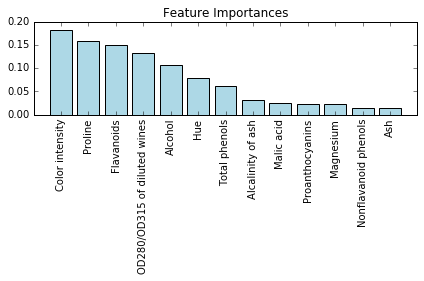

In [144]:
from sklearn.ensemble import RandomForestClassifier
#Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
#ランダムフォレストオブジェクトの生成
#木の個数10000、すべてのコアを用いて並列計算を実行
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
#特徴量の重要度を抽出
importances = forest.feature_importances_
#重要度の降順で特徴量のインデックスを抽出
#[::-1]で降順にしている
indices = np.argsort(importances)[::-1]
#重要度の降順で特徴量の名称、重要度を表示
#-が左寄せ、*は文字幅を指定、2dは空白で2桁にパディング
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [145]:
X_train.shape

(124, 13)

In [147]:
from sklearn.feature_selection import SelectFromModel
#特徴選択オブジェクトの生成
sfm = SelectFromModel(forest,prefit=True,threshold=0.15)
#特徴量を抽出
X_selected = sfm.transform(X_train)
X_selected.shape

(124, 3)

In [110]:
indices2 = np.argsort(importances)

In [111]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2])

In [112]:
indices2

array([ 2,  7,  4,  8,  1,  3,  5, 10,  0, 11,  6, 12,  9])

In [142]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f16" % (f+1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.18248316
 2) Proline                        0.15861016
 3) Flavanoids                     0.15094816
 4) OD280/OD315 of diluted wines   0.13198716
 5) Alcohol                        0.10658916
 6) Hue                            0.07824316
 7) Total phenols                  0.06071816
 8) Alcalinity of ash              0.03203316
 9) Malic acid                     0.02540016
10) Proanthocyanins                0.02235116
11) Magnesium                      0.02207816
12) Nonflavanoid phenols           0.01464516
13) Ash                            0.01391616


In [1]:
tuple(range(5))

(0, 1, 2, 3, 4)

In [8]:
from itertools import combinations
for p in combinations((1,2,3), 2):
    print(p)

(1, 2)
(1, 3)
(2, 3)
